In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
num_workers = 0
device = "cpu"

IMG_DIM = 640
batch_size = 1
samples_train = None

# Anchor Hyper parameters
pyramid_levels = [3, 4, 5, 6, 7] # note don't change this
ratios = [0.3333333333, 0.5, 1, 2, 3]
scales = [0.5, 1, 2]

# Network Hyperparameters
num_classes = 501

# Loss Hyperparameters
IoU_bkgrd=0.4
IoU_pos=0.5
regress_factor=[0.1, 0.1, 0.2, 0.2]

In [6]:
from utils import Visualiser
from preprocess.preprocess import transformer, img_transform, reverse_img_transform
import torch
from models.utils import *
import json

In [7]:
clsids_to_names = json.load(open("data_info/subsets/1/clsids_to_names.json",'r'))
clsids_to_idx = json.load(open("data_info/subsets/1/clsids_to_idx.json",'r'))
idx_to_cls_ids = {v: k for k, v in clsids_to_idx.items()}
idx_to_names = {k: clsids_to_names[v] for k, v in idx_to_cls_ids.items()}

In [8]:
anchors = Anchors(pyramid_levels=pyramid_levels,ratios=ratios,
                 scales=scales, device = device)

anc = anchors(torch.randn((1,3,IMG_DIM,IMG_DIM)).shape[2:])
dis_anchors = anc[0]

In [10]:
vis = Visualiser(num_classes, idx_to_names, reverse_img_transform)

100%|██████████| 50/50 [00:00<00:00, 629.81it/s]


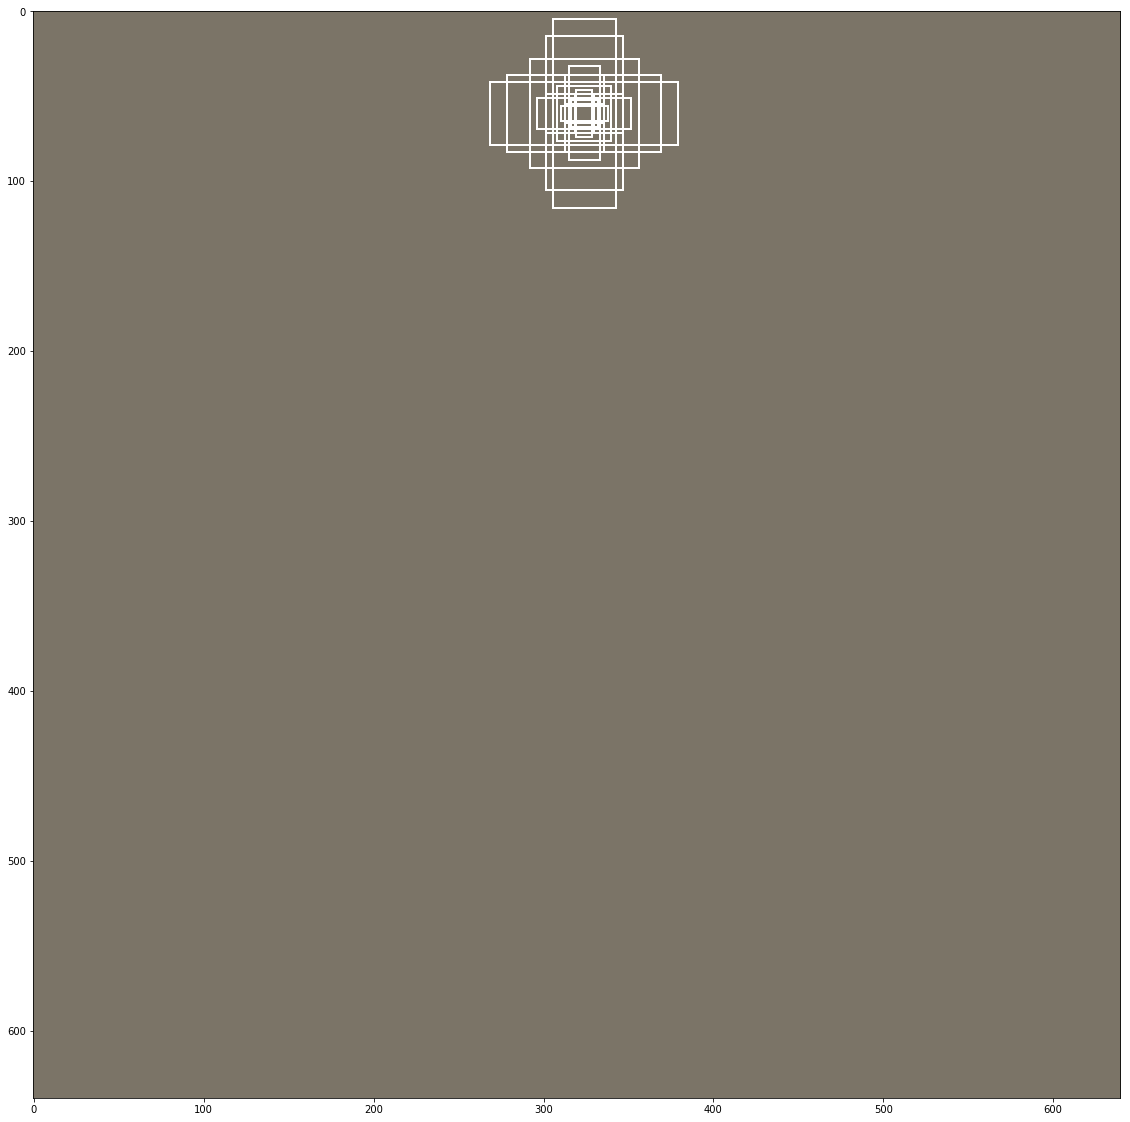

In [32]:
img = torch.zeros((3,IMG_DIM, IMG_DIM))
anchor_units = (9000, 9015, 50)
vis.display_anchors(img, dis_anchors, anchor_units=anchor_units,figsize=(20,20))